In [1]:
import re
import math
from matplotlib.pyplot import plot
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
from cycler import cycler
import numpy as np
import scipy as sp
import tkinter as tk

In [4]:
def FileReader(filename):
    filewrapper = open('/home/najet/Documents/NAJET/DataScience/Labs/historical-hourly-weather-data/'+filename+'.csv','r')
    lines =filewrapper.readlines()
    return lines

In [5]:
pattern = r'Seattle'
lines = FileReader('city_attributes')
for line in lines:
    if re.search(pattern, line):
        print(line)

Seattle,United States,47.606209,-122.332069



In [7]:
weathers = FileReader('weather_description')
#for weather in weathers[2:]:
    #print(weather.split(',')[0], weather.split(',')[4])


In [8]:
tempearatures = FileReader('temperature')
ltempearature = []
datet = []
for tempearature in tempearatures[2:]:
    #print(tempearature.split(',')[0], tempearature.split(',')[4])
    if re.search(r'2017',tempearature.split(',')[0].split(' ')[0]):
        datet.append(tempearature.split(',')[0].split(' ')[0])
        ltempearature.append(tempearature.split(',')[4])

#len(ltempearature)

In [9]:
humiditys = FileReader('humidity')
lhumidity = []
hdate = []
ddate = []

for humidity in humiditys[2:]:
    #h = [humidity.split(',')[0], humidity.split(',')[4]]
    #print(h)
    if re.search(r'2017',humidity.split(',')[0].split(' ')[0]):
        ddate.append(humidity.split(',')[0].split(' ')[0])
        hdate.append(humidity.split(',')[0].split(' ')[1])
        lhumidity.append(humidity.split(',')[4])


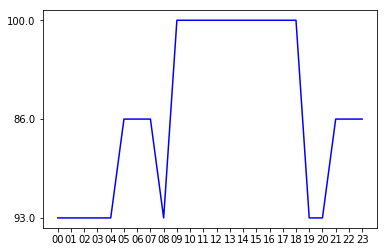

In [10]:
get_ipython().magic(u'matplotlib inline')
plot([hour.split(':')[0] for hour in hdate[:24]], lhumidity[:24],'b')

In [17]:
#plot([day.split('-')[1] for day in datet], ltempearature,'b')


In [12]:
temptotal = 0
humdtotal = 0
meantemp = []
meanhumd = []

counter = 0

#print(len(ltempearature))
r = len(ltempearature) % 24

while counter <= (len(ltempearature) - 24 ):
    temptotal = 0
    humdtotal = 0
    for i in range(counter,counter+23):
        temp = int(float(ltempearature[i]) - 273.15 )
        humd = int(float(lhumidity[i]))
        #print(temp)
        temptotal+= temp
        humdtotal+= humd
    tempmean = temptotal / 24
    humdmean = humdtotal / 24
    meantemp.append(round(tempmean,2))
    meanhumd.append(round(humdmean,2))
    counter+=24 
    
    
minumum = min(ltempearature[:24])
mnum = round(int(float(minumum)))
maximum = max(ltempearature[:24])
maxnum = round(int(float(maximum)))
#print("min tempeature:", mnum)
#print("max tempeature:",maxnum)
#print("mean:", round(mean,2))


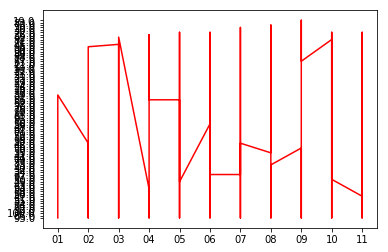

In [13]:
plot([day.split('-')[1] for day in ddate], lhumidity,'r')

In [14]:
print("len:",len(meantemp))
print(meantemp)

len: 333
[1.0, 0.17, -1.96, -1.33, -2.67, -3.54, -1.79, 1.17, 2.92, 1.67, 0.08, -1.83, -1.83, -0.62, -0.46, 0.54, 4.67, 7.88, 7.08, 4.54, 4.96, 4.96, 3.21, 1.58, 2.58, 4.54, 4.33, 4.29, 4.12, 6.0, 3.92, 1.5, 1.0, 1.5, 4.29, 3.46, 0.21, 0.62, 0.83, 5.5, 7.29, 3.42, 2.71, 2.83, 2.79, 7.17, 10.12, 6.58, 5.54, 4.42, 5.08, 4.46, 3.38, 1.88, 1.67, 2.17, 2.75, 2.08, 1.88, 5.54, 5.88, 7.12, 3.67, 2.96, 2.12, 1.92, 3.79, 3.33, 8.04, 5.83, 8.25, 8.67, 10.5, 9.38, 6.67, 4.67, 7.67, 3.5, 6.17, 7.58, 9.25, 6.75, 8.08, 7.04, 6.25, 7.38, 7.5, 8.54, 7.08, 6.96, 9.04, 7.96, 6.12, 7.75, 9.38, 8.88, 10.0, 7.08, 5.92, 8.25, 5.79, 9.38, 8.29, 6.58, 6.5, 8.42, 12.12, 10.21, 8.54, 9.0, 8.79, 12.46, 8.92, 7.75, 9.17, 9.58, 7.96, 8.04, 8.38, 9.08, 7.88, 9.0, 13.25, 14.92, 13.46, 8.46, 8.96, 9.92, 11.21, 12.79, 13.25, 7.83, 8.04, 8.83, 8.83, 7.5, 8.67, 10.58, 13.08, 14.62, 14.92, 17.0, 17.96, 11.88, 11.29, 14.62, 17.58, 18.79, 15.58, 13.04, 12.67, 14.92, 14.21, 14.29, 12.71, 12.33, 15.88, 18.0, 14.92, 11.75, 10

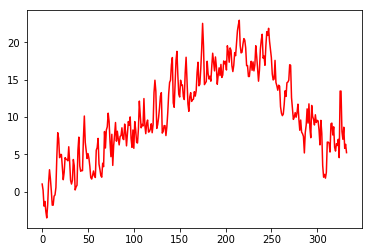

In [15]:
plt.plot([day for day in range(333)], meantemp,'r')
plt.show()

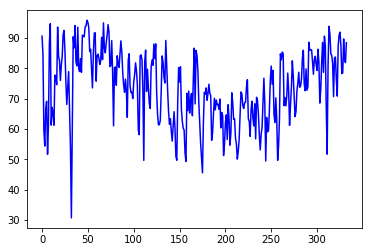

In [16]:
plot([day for day in range(333)], meanhumd,'b')

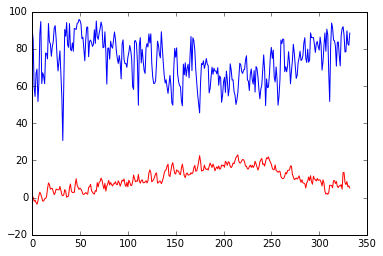

In [39]:
plot([day for day in range(333)], meantemp,'r', meanhumd,'b')

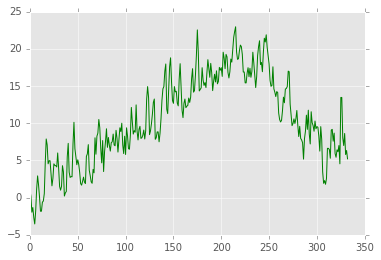

In [40]:
plt.style.use('ggplot')
plt.plot([day for day in range(333)], meantemp,'g')
plt.show()

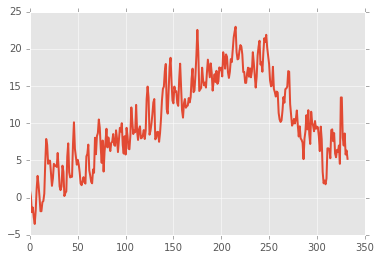

In [41]:
mpl.rc('lines', linewidth=2, color='g')
fig = plt.plot(meantemp)

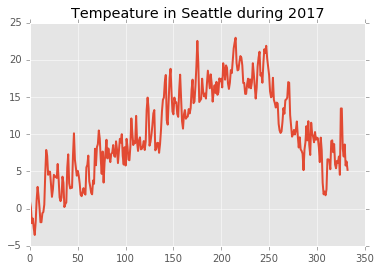

In [42]:
fig, x = plt.subplots()
x.set_title('Tempeature in Seattle during 2017')
x.plot(meantemp)


In [48]:
def ShowWeather():
    
    fig, (x, y)  = plt.subplots(nrows=2)
    x.set_title('Tempeature in Seattle during 2017')
    x.set_xlabel('Days')
    x.set_ylabel('Tempeature (°C)')
    p = np.arange(0, 350, 30)
    x.plot(meantemp,'r')
    y.set_title('Humidity in Seattle during 2017')
    y.set_xlabel('Days')
    y.set_ylabel('Humidity (%)')
    y.plot(meanhumd,'b')
    fig.text(1, 1, 'Weather in Seattle',
         fontsize=50, color='gray',
         ha='right', va='bottom', alpha=2)
    return fig.subplots_adjust(hspace=0.8)

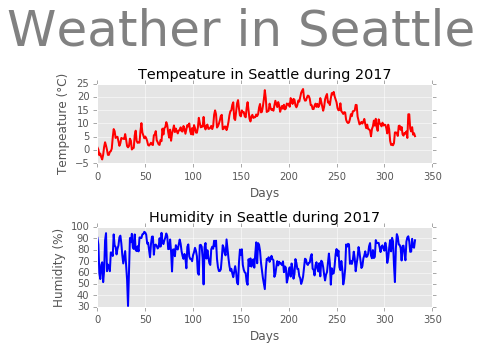

In [49]:
ShowWeather()

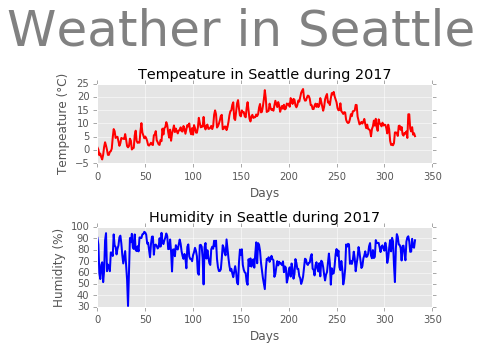

In [55]:
class WeatherApp(tk.Frame):
    def __init__(self, master=None):
        super().__init__(master)
        self.pack()
        self.create_widgets()

    def create_widgets(self):
        self.weath = tk.Button(self)
        self.weath["text"] = "Show weather"
        self.weath["command"] = ShowWeather()
        self.weath.pack(side="top")

        self.quit = tk.Button(self, text="QUIT", fg="red",
                              command=root.destroy)
        self.quit.pack(side="bottom")


root = tk.Tk()
app = WeatherApp(master=root)
app.mainloop()